# Preliminary Code for Plots

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/var/folders/4l/mjqp680s3ld1jxwcfps_43800000gn/T/ipykernel_98283/620542959.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(dict([(i+1,pd.Series(a)) for i,a in enumerate(coef_tab[:6])]),1)\
/var/folders/4l/mjqp680s3ld1jxwcfps_43800000gn/T/ipykernel_98283/620542959.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(dict([(i+1,pd.Series(a)) for i,a in enumerate(coef_tab[:6])]),1)\
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precede

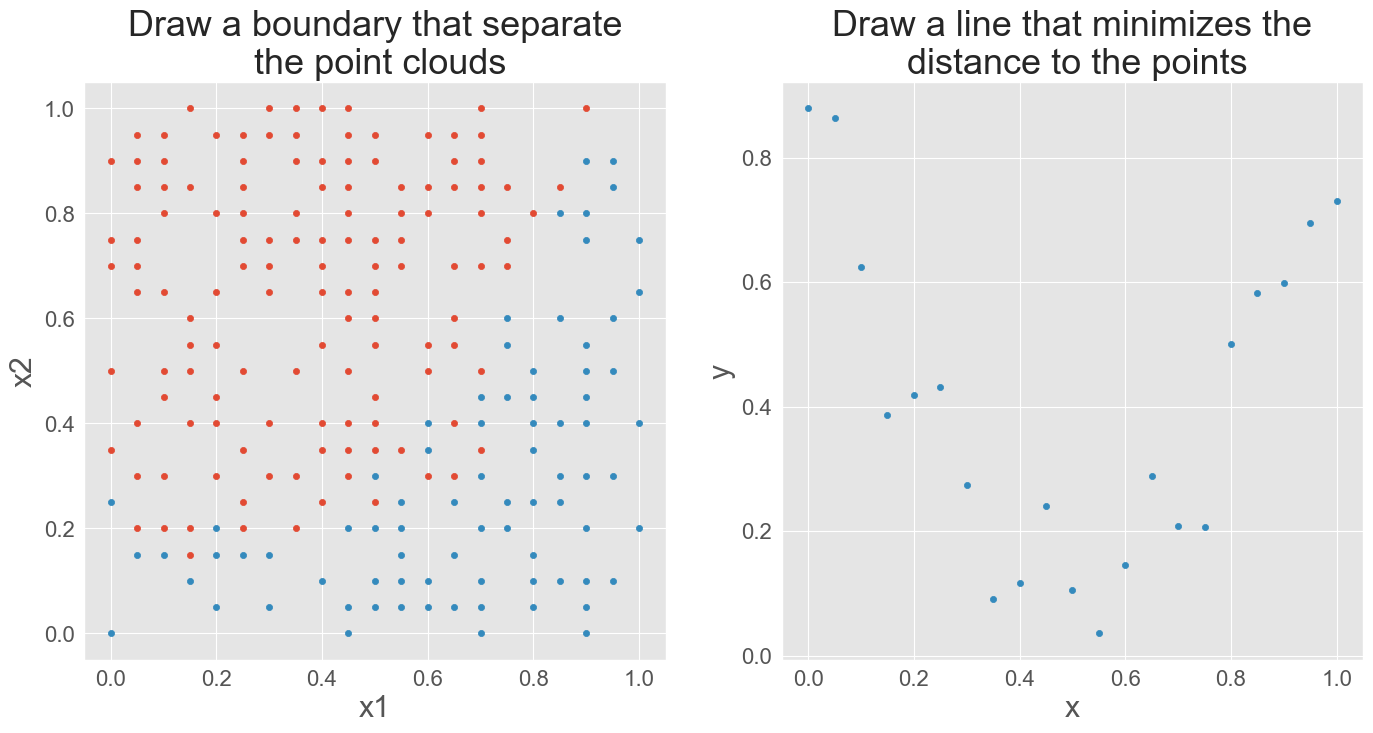

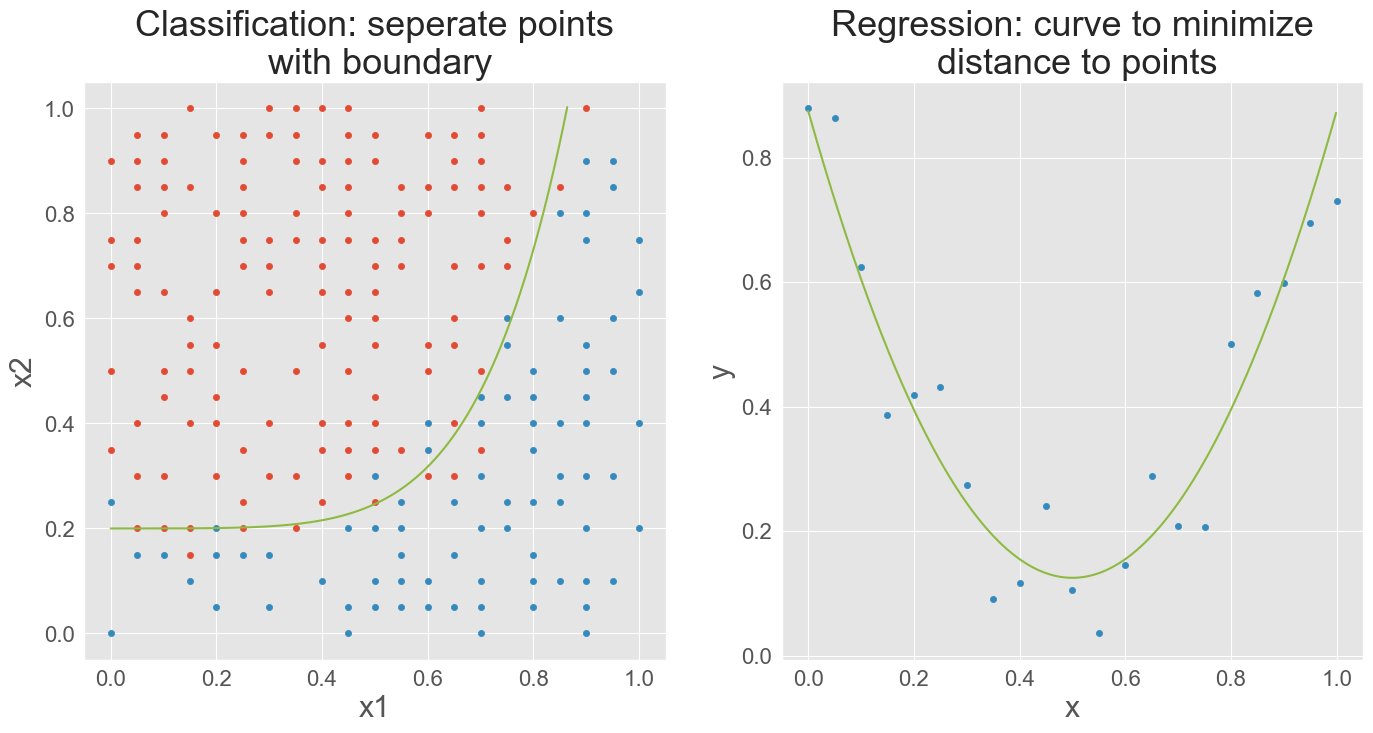

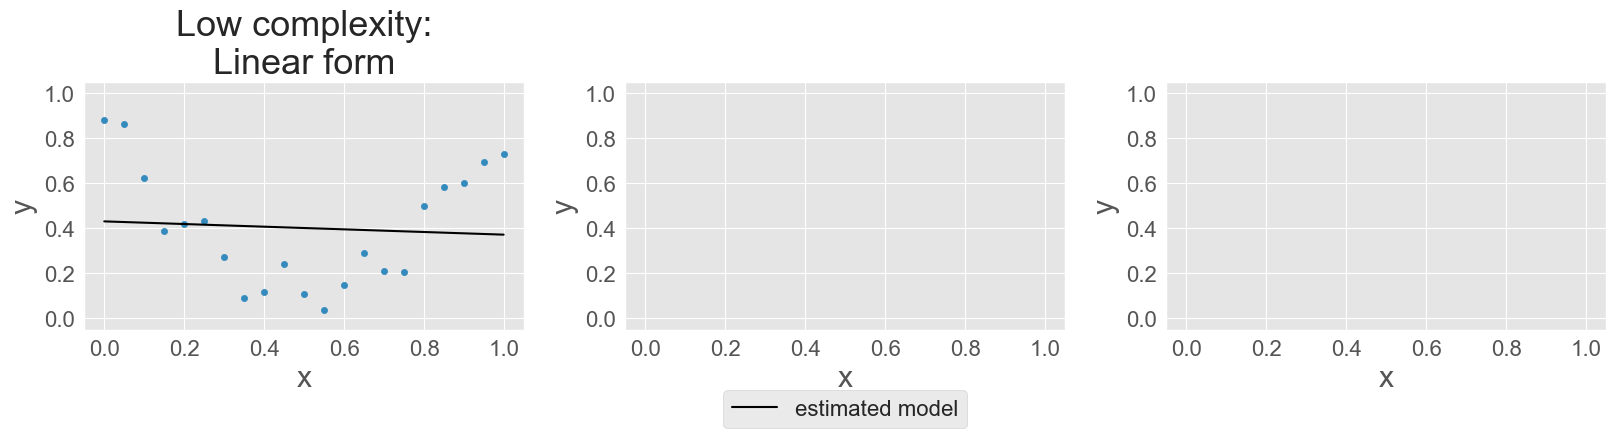

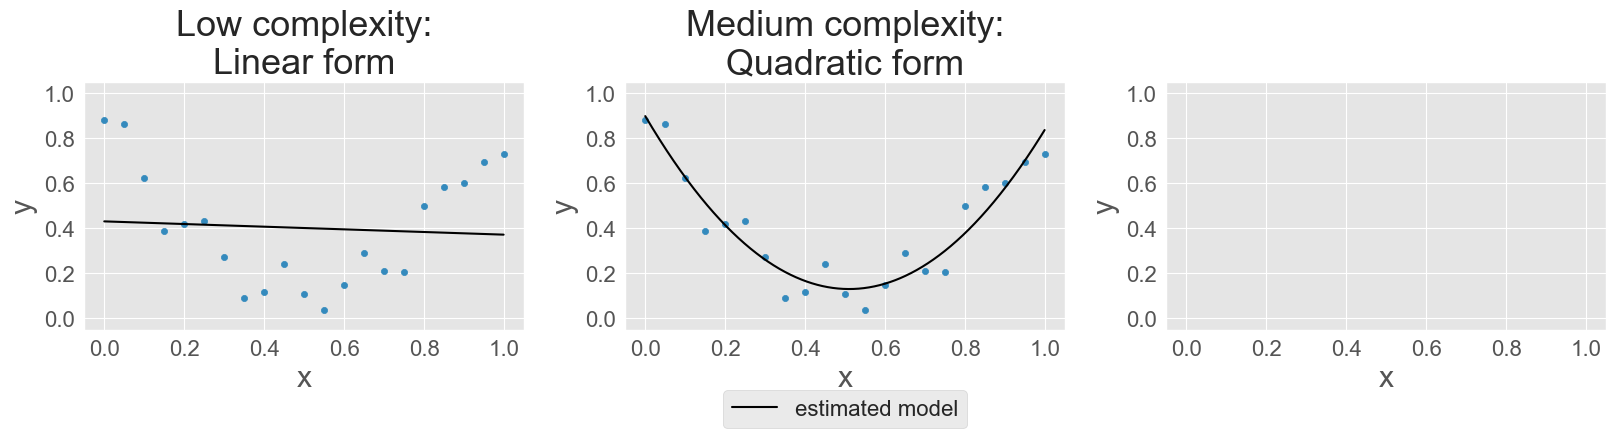

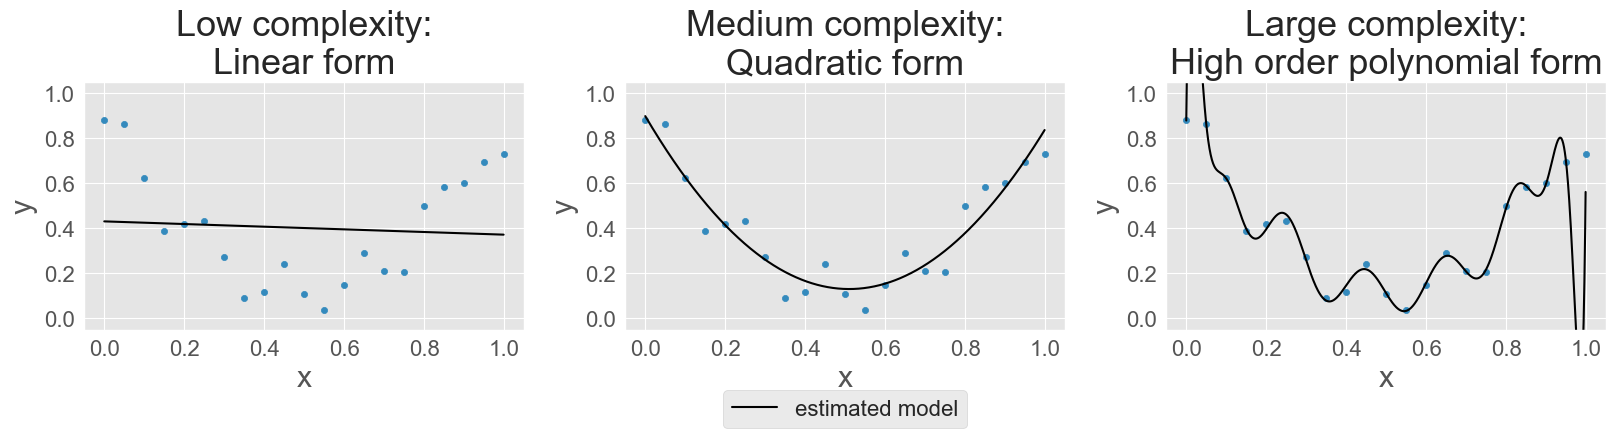

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

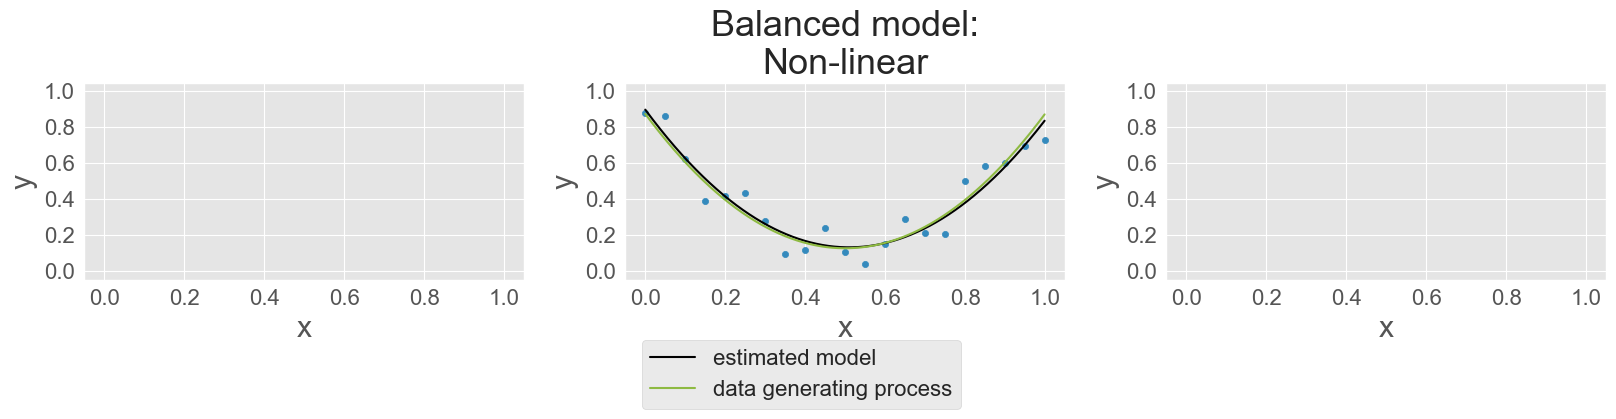

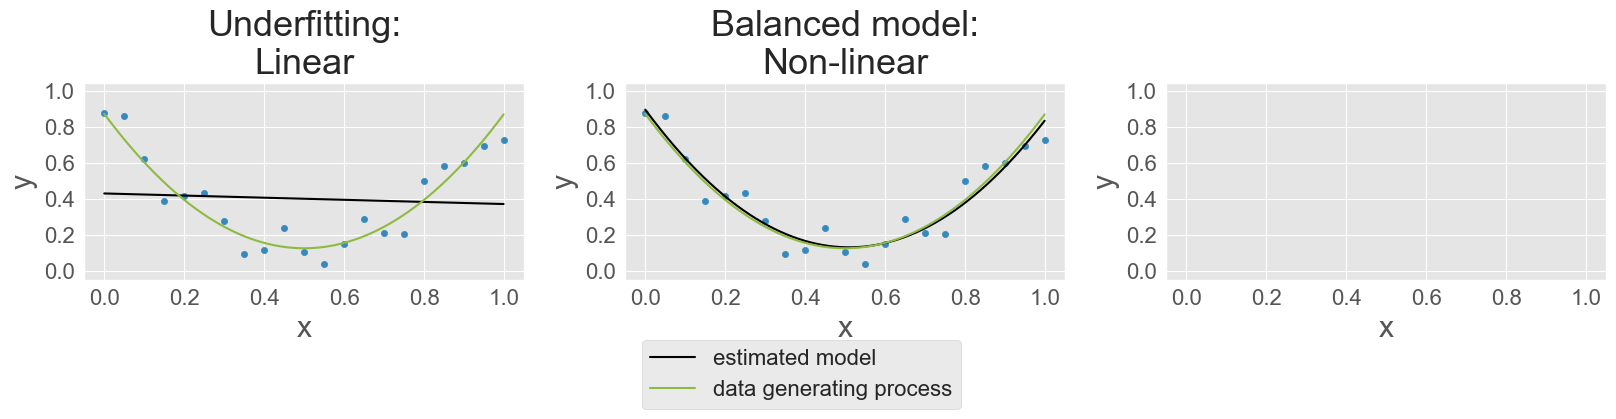

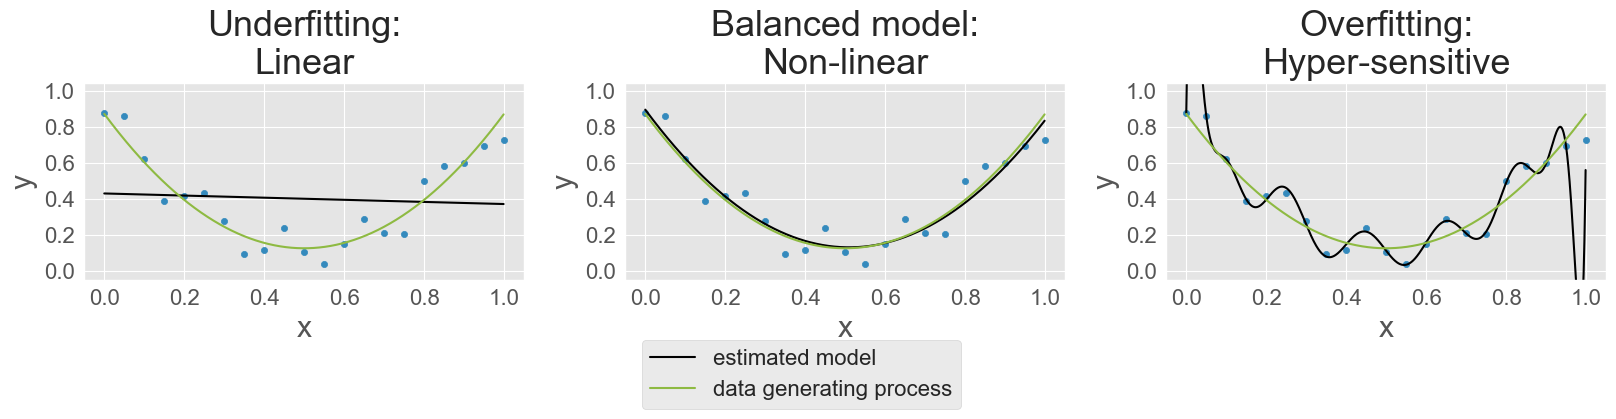

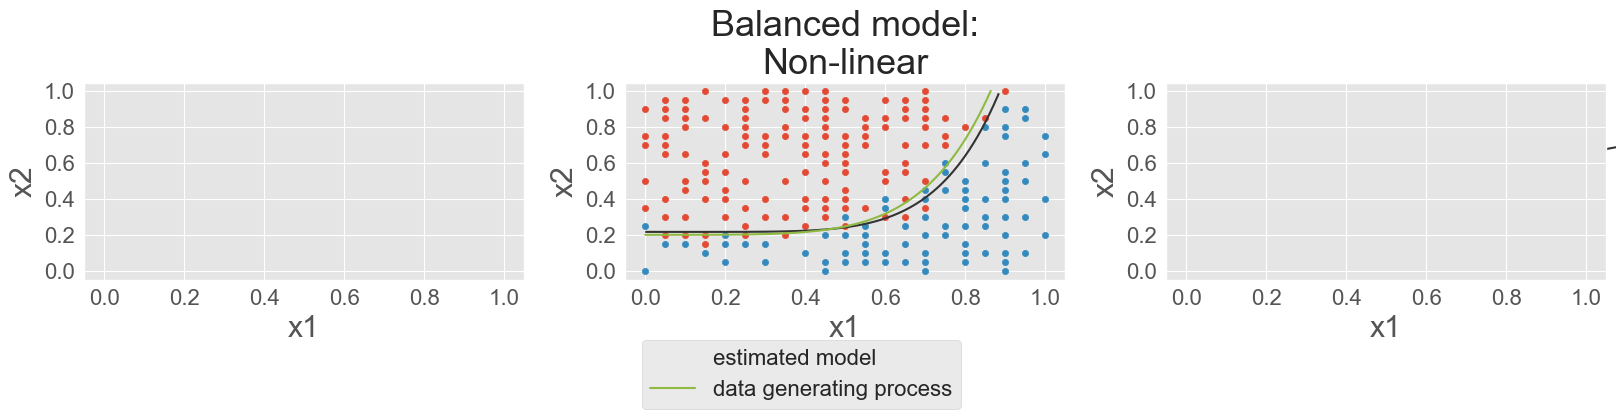

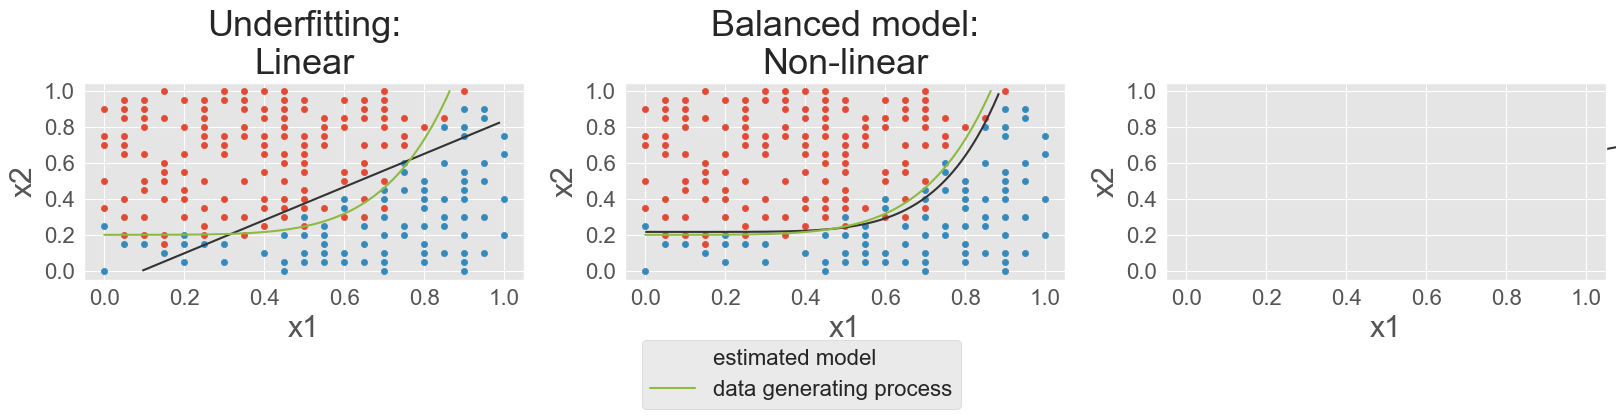

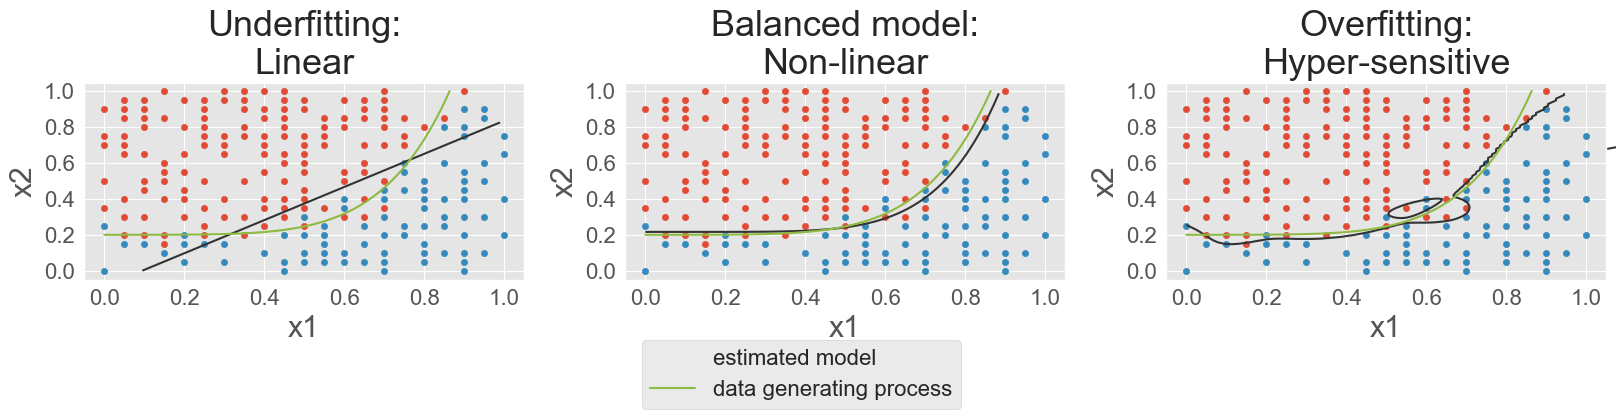

In [9]:
%run ML_plots.ipynb

<style>
.rendered_html * + ul {
	margin-top: 0.5em;
}
    div.text_cell_render {
    padding: 0.0em 0.0em 0.0em 0.0em;
}
    .reveal p {
    margin: 20px 10;
    line-height: 1.3;
}
    html, body, .reveal div, .reveal span, .reveal applet, .reveal object, .reveal iframe, .reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6, .reveal p, .reveal blockquote, .reveal pre, .reveal a, .reveal abbr, .reveal acronym, .reveal address, .reveal big, .reveal cite, .reveal code, .reveal del, .reveal dfn, .reveal em, .reveal img, .reveal ins, .reveal kbd, .reveal q, .reveal s, .reveal samp, .reveal small, .reveal strike, .reveal strong, .reveal sub, .reveal sup, .reveal tt, .reveal var, .reveal b, .reveal u, .reveal center, .reveal dl, .reveal dt, .reveal dd, .reveal ol, .reveal ul, .reveal li, .reveal fieldset, .reveal form, .reveal label, .reveal legend, .reveal table, .reveal caption, .reveal tbody, .reveal tfoot, .reveal thead, .reveal tr, .reveal th, .reveal td, .reveal article, .reveal aside, .reveal canvas, .reveal details, .reveal embed, .reveal figure, .reveal figcaption, .reveal footer, .reveal header, .reveal hgroup, .reveal menu, .reveal nav, .reveal output, .reveal ruby, .reveal section, .reveal summary, .reveal time, .reveal mark, .reveal audio, .reveal video {
    margin-bottom: -1px;
}
    div.text_cell_render {
    padding: 0em 0em 0.5em 0.0em;
}
</style>

# Session 11: Linear Regression and Regularizaton

*Tobias Gabel Christiansen*

## Recap from This Morning (I/III)

What are the objectives of empirical research? 

1. *causation*: what is the effect of a particular variable on an outcome (the DGP)? 
2. *prediction*: find some function that provides a good prediction of $y$ as a function of $x$

How can we think of this in terms of a simple linear model?

$$ y = \alpha + \beta x + \varepsilon $$

- *causation*: interested in $\hat{\beta}$ 

- *prediction*: interested in $\hat{y}$ 


These objectives are related and informative about each other... Yet, not the same!

## Small Digression (I/IV)
Let's consider an example to illustrate how objectives matter.

Say we are interested in modelling 

$$y=\beta_1 x_1 + \beta_2 x_2+u$$

- Where the true DGP is as follows:
$\beta_1 \neq 0$, $\beta_2 \neq 0$ and $cov(x_1,x_2)\neq 0$. 
- We fit an OLS model, but for some reason $x_2$ is unobservable to us e.g. we only have access to $x_1$ (in essence we underfit)

*What does the data scientist (prediction) and social scientist (causal inference) think, respectively?*

Well.. both would indeed prefer observing $x_2$ since including it would:
   - Avoid omitted variable bias (social scientist happy)
   - Increase predictive performance (data scientist happy)

But given that's not feasbile then:
   - The social scientist would prefer small $cov(x_1,x_2)$ since this would reduce the size of the bias!
   - The data scientist would prefer high $cov(x_1,x_2)$ since this would increase predictive performance

## Small Digression (II/IV)
Let's see it in action:

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

bias = []
R2 = []

for cov in np.linspace(0,1,11):
    
    np.random.seed(1)
    
    #Training data
    x1 = np.random.normal(0,1, size = 100)
    x2 = cov*x1 + np.random.normal(0,1, size = 100)
    y = 1*x1 + 2*x2 + np.random.normal(0,1, size = 100)
    
    reg = LinearRegression().fit(x1.reshape(-1,1), y)
    
    #Test data
    x1_t = np.random.normal(0,1, size = 100)
    x2_t = cov*x1_t + np.random.normal(0,1, size = 100)
    y_t = 1*x1_t + 2*x2_t + np.random.normal(0,1, size = 100)
    
    bias.append(reg.coef_ - 1)
    R2.append(reg.score(x1_t.reshape(-1,1), y_t))


## Small Digression (III/IV)

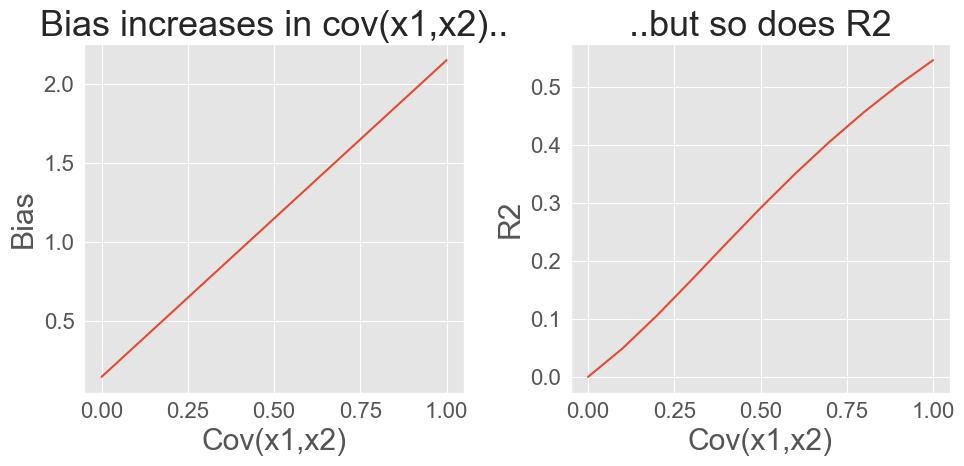

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

ax[0].plot(np.linspace(0,1,11), bias)
ax[0].set(ylabel = 'Bias', xlabel = 'Cov(x1,x2)', title = 'Bias increases in cov(x1,x2)..')

ax[1].plot(np.linspace(0,1,11), R2)
ax[1].set(ylabel = 'R2', xlabel = 'Cov(x1,x2)', title = '..but so does R2')

plt.tight_layout()

When $cov(x_1,x_2)$ is high: $x_1$ explains more of the variation in $y$ since it captures both its own effect on $y$ *and* some of the effect from $x_2$ on $y$ (the latter obviously makes causal inference muddy, but enhances predictive performance)

## Small Digression (IV/IV)
Let's also quickly use the example to talk about overfitting:

Say we are interested in modelling 

$$y=\beta_1 x_1 + \beta_2 x_2+u$$

- Where the true DGP is as follows:
$\beta_1 = 0$, $\beta_2 \neq 0$ and $cov(x_1,x_2) = 0$. 
- We fit an OLS model, but for some reason $x_2$ is unobservable to us e.g. we only have access to $x_1$
- $x_1$ is not related to y, so our model should not be able to explain any of the variation in $y$, right?

Well, let's take a look:

In [12]:
np.random.seed(1)
x1 = np.random.normal(0,1, size = 25)
x2 = np.random.normal(0,1, size = 25)
y = 2*x2 + np.random.normal(0,1, size = 25)

Even though $y$ and $x_1$ are *truly* unrelated, then they may be *spuriously* related in our particular sample due to chance:

In [13]:
print(f"R^2 when using x1: {round(LinearRegression().fit(x1.reshape(-1,1), y).score(x1.reshape(-1,1), y),2)}")

R^2 when using x1: 0.08


This issues grows if we include higher order polynomials.

In [14]:
print(f"R^2 when using higher order polynomials of x1: {round(LinearRegression().fit(np.stack((x1, x1**2, x1**3, x1**4, x1**5), axis = 1), y).score(np.stack((x1, x1**2, x1**3,x1**4, x1**5), axis = 1), y),2)}")

R^2 when using higher order polynomials of x1: 0.22


Those with an eye for details noticed that I reduced the sample size! This was done for illustration: Overfitting issues are inversely related to sample size (easier to end up fitting spurious relations in a small samples)

## Recap from This Morning (II/III)

Supervised, unsupervised and reinforcement learning
- Supervised learning: Learning a prediction rule for labelled data
- Unsupervised learning: Discovering patterns in unlabelled data
- Reinforcement learning: Dynamically improving performance based on interactions with an environment

Controlling underfitting/overfitting with machine learning
- Overfitting: Fitting spurious relations in your particular data set (risk grows with model complexity)
- Underfitting: Not capturing the actual/true relations (risk decreases with model complexitiy)
- With ML we try to balance these

Classification vs regression
- Classification: Categorical target
- Regression: Numeric target

## Recap from This Morning (III/III)

Model Validation
- We cannot validate model on the data that was used to fit/train our model 
- Why? Model has been customized to our particular data set!
- Solution: Set a test data set aside in order to evaluate performance
- Will learn more about *cross validation* in this course

The perceptron learning algorithm
- The perceptron learning rule
    - Initialize weights randomly
    - Repeat until no error
        - Given weights, predict target
        - Update weights as a function of prediction errors
- Works best on data that are linearly seperable

Beyond the Perceptron
- Different activation functions/models:
    - Linear activation: Adaline
    - Sigmoid activation (logistic regression)
- Approximating a solution with gradient descent:
    - (Mini) batch gradient descent
    - Stochastic gradient descent 

## Question: What do we do when data are not linearly seperable? (I/II)

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_03.png' alt="Drawing" style="width: 1200;"/></center>

Short answer: Perceptron is not appropriate... Lot's of better solutions out there. We mainly introduce Perceptron as an illustration.

## When You Cannot Complete All Exercises, It Sucks... (I/II)

Believe me: we have all been there... Let me give you an overview of what we will cover:

Module 10:
1. An intro to modelling and machine learning
2. The perceptron learning algorithm
3. Model Validation
4. Beyond the Perceptron

Module 11 (**where we are at!**):
1. Modelling data: overfitting vs underfitting
2. Linear regression models: exact vs. approximate
3. The curse of overfitting and regularization
4. Implementation details

## When You Cannot Complete All Exercises, It Sucks... (II/II)

Module 12:
1. The bias/variance trade-off
2. Model building (pipelines)
3. Model validation (basic validation, cross validation)
4. Tools for model selection

Module 13 (**No exercises!**):
1. Performance Evaluation Metrics
2. Nested cross-validation
3. Non-linear ML
  -  Tree based models
  -  Neural networks
4. Machine learning for social scientists

# Associated Readings for Session 11

PML, chapter 3 (subset):
- Using regularization to reduce overfitting
- Introduction to penalization: Lasso and Ridge regression

PML, chapter 4 (subset):
- Partitioning a dataset into separate training and test sets (`train_test_split()`)
- The importance and practicalities of rescaling features (`StandardScaler()`)
- Feature selection
    - Lasso and Ridge regression (L1 and L2 penalization)

PML, chapter 10 (subset):
- Applying our methods to linear regression:
    - Gradient descent for least squares
    - Validation and evaluation
    - Regularization

# Modelling Data: Overfitting vs Underfitting

## Model Complexity (I/III)
*What could a model of low complexity look like in a regression problem?*

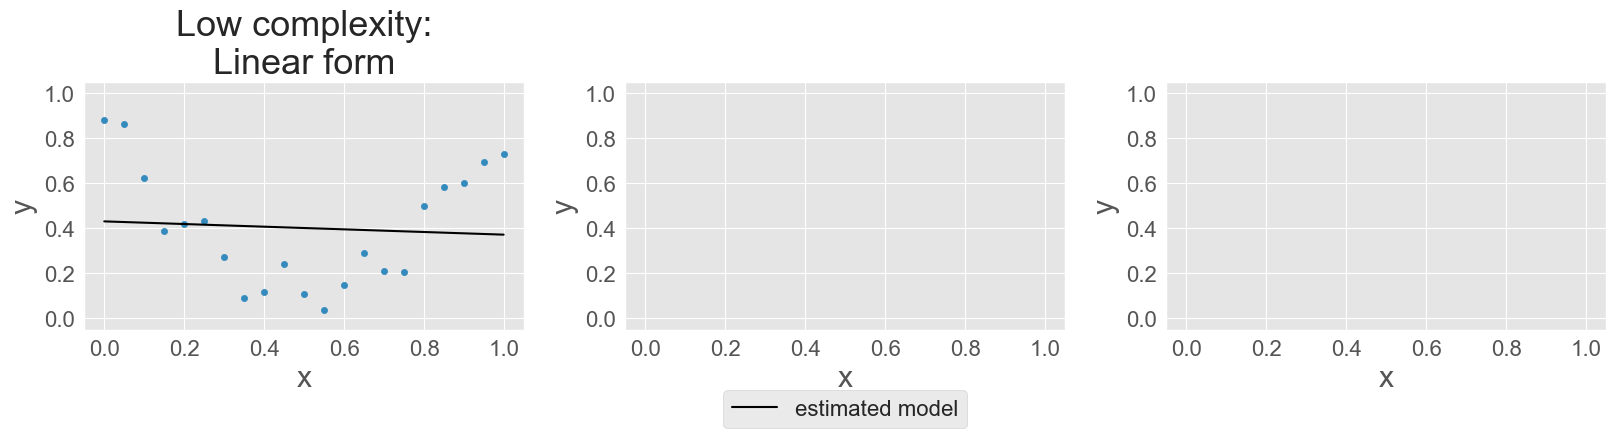

In [15]:
f_complexity[0]

## Model Complexity (II/III)
*What could a model of medium complexity look like in a regression problem?*

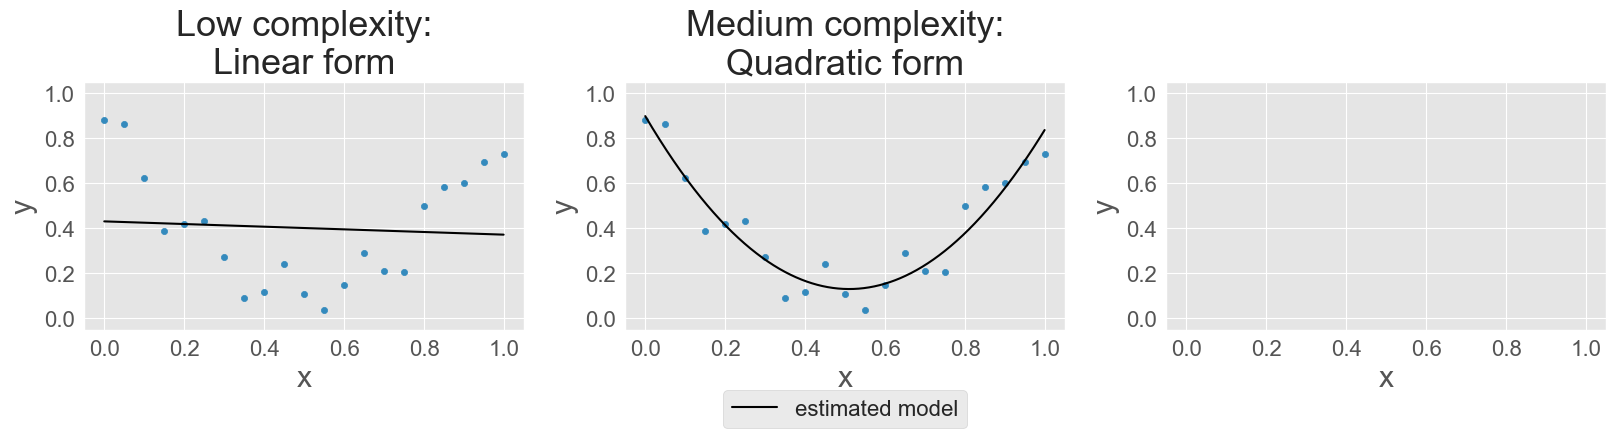

In [16]:
f_complexity[1]

## Model Complexity (III/III)
*What could a model of high complexity look like in a regression problem?*

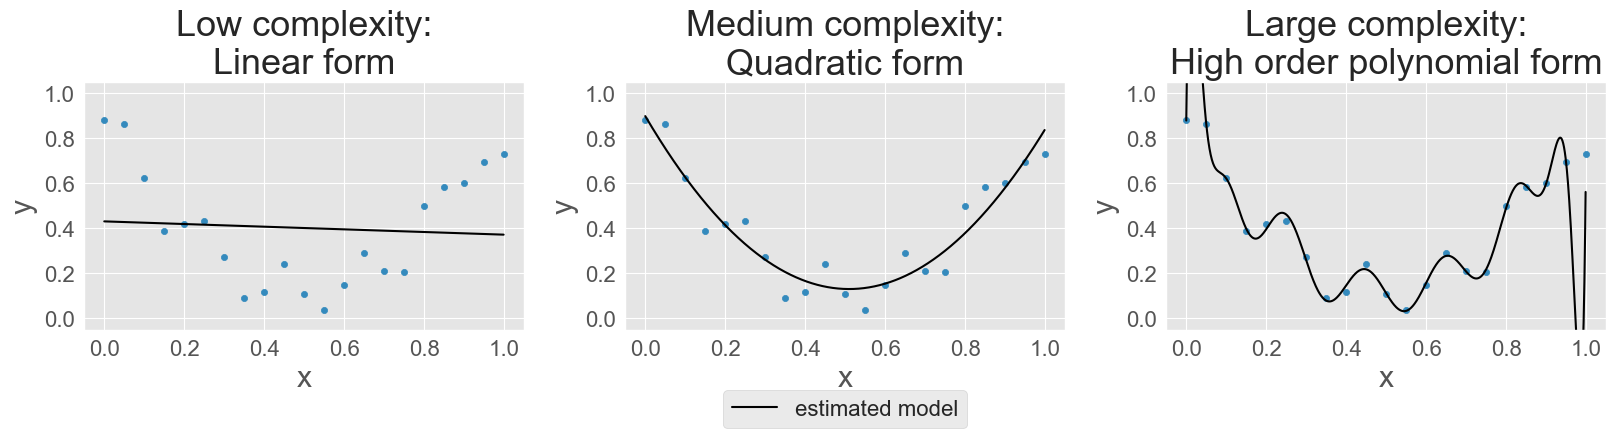

In [17]:
f_complexity[2]

## Model Fitting (I/II)
- Which model fitted the data best?
- Which model do you think will give the best results if we apply to new data?

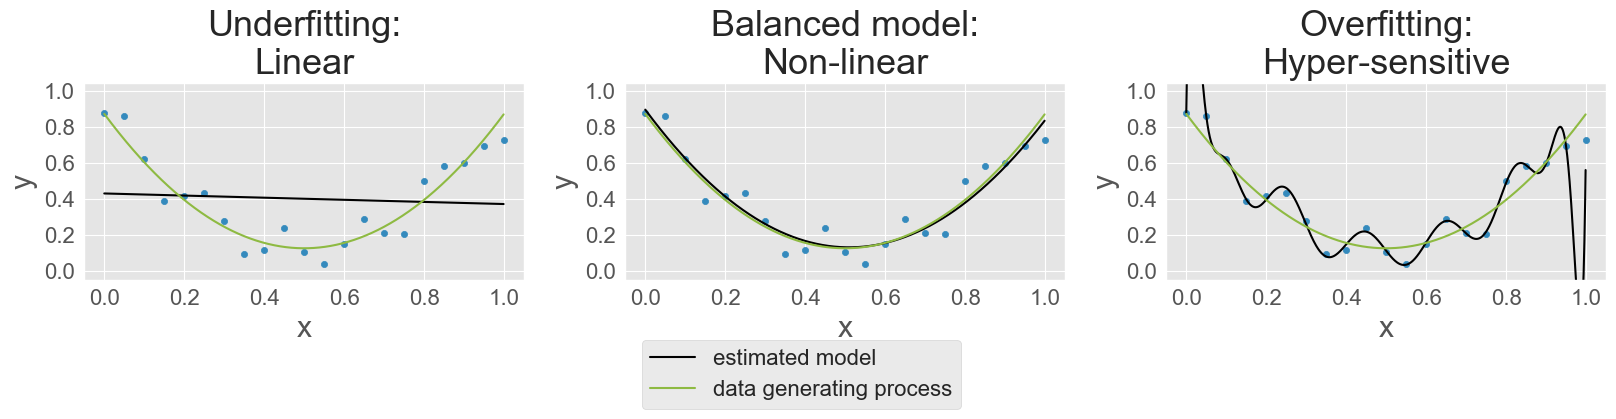

In [18]:
f_bias_var['regression'][2]

## Model Fitting (II/II)
*What could underfitting and overfitting look like in a classification problem?*

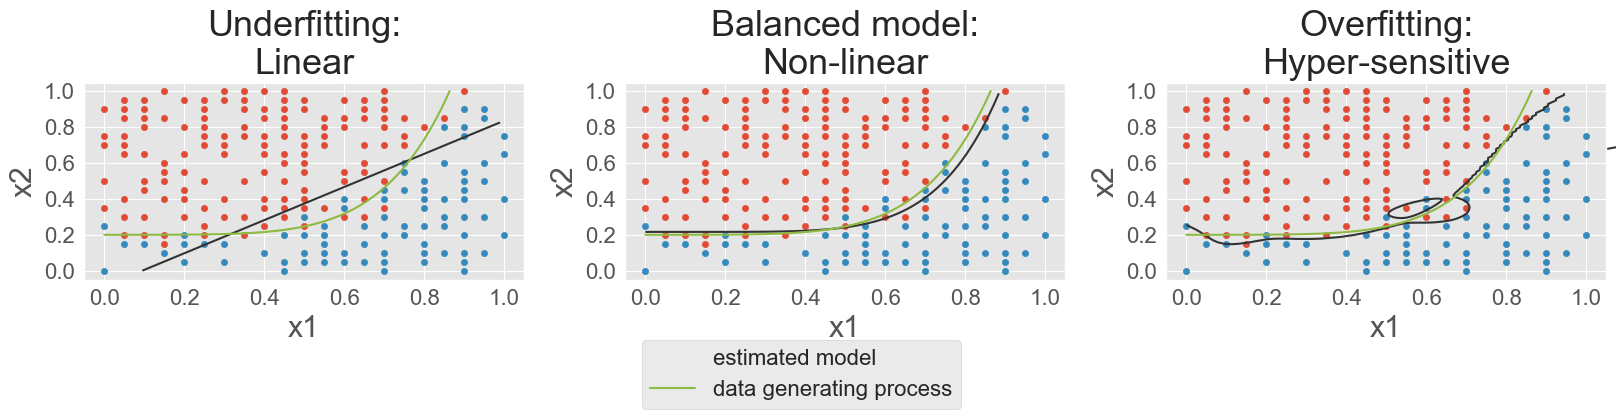

In [19]:
f_bias_var['classification'][2]

# Videos and Exercises

Now proceed to the notebook with videos and exercises, where you will:
- Implement gradient descent for solution approximation
- Apply Lasso and Ridge regression for regularization when the target is numeric
- Learn more about implementation details

# Loading Packages...

In [20]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

# VIDEO 11.1: Regression Models: Exact vs. Approximate Solutions

## Estimation (I/VII)
*Do we already know some ways to estimate linear regression models?*

Yes, in particular OLS...
- Social scientists know all about the Ordinary Least Squares (OLS).
- Some properties of OLS:
    - Is applied to solve *linear models* (linearity refers to the way parameters enters).
    - Easy to estimates both parameters and their standard deviation.
    - Is the best linear unbiased estimator under regularity conditions. 

*So how does the OLS estimator look?*

- You should have seen this before... $\hat \beta=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$ 
- This is derived from by solving for $\beta$ in FOC: $ X'y=X'X\beta$ 
    - note: equivalent to: $ X'\varepsilon=0$

- In particular, computation requires non-perfect multicollinarity. 
- Moreover, inversion of the features matrix can be computationally heavy for large data sets with many features.

## Estimation (II/VII)
*Are there other approaches to estimating a linear regression model?*

- First order methods (e.g. gradient descent)
- Second order methods (Newton, quasi-Newton)
    - often faster, but may not always work (requires that the second-order derivative exists)
- What about local minima?
    - not a big problem in this course as we use linear models only (e.g. cost function is SSE which is convex)
    - we should make grid search over random values (e.g. try initializing weights differently)

## Estimation (III/VII)
*In detail, how was it that this worked?*

Like with Adaline, minimize the sum of squared errors (SSE): $\text{SSE}=\boldsymbol{e}^T\boldsymbol{e},\quad \boldsymbol{e}=\boldsymbol{y}-\boldsymbol{Xw}$.

In [33]:
obs = 10**4
variables = 2

# GET COVARIATES AND BIAS
X = np.random.normal(size=(obs,variables+1))
X[:,0] = 1

# GET TARGET AND WEIGHTS
y = X[:,1]+np.random.normal(size=(obs))
w = np.random.normal(size=(variables+1))

# MEASURE ERROR AND LOG MSE
e = y-(X.dot(w))
lRMSE = np.log(np.sqrt((e**2).mean()))

[[ 1.          0.08129184  1.35362854]
 [ 1.          1.00533438 -1.05155849]
 [ 1.          0.64389493  0.75612548]
 ...
 [ 1.          0.10368028 -1.11353389]
 [ 1.          1.76780089  0.96675939]
 [ 1.         -1.05928398 -0.96685836]]


## Estimation (IV/VII)
*And what about the updating..? What is it about the first order deritative?*

\begin{align}\frac{\partial SSE}{\partial\hat{\textbf{w}}} & =-\textbf{X}^{T}\textbf{e}\qquad\text{(the gradient)}\\
\Delta\hat{\textbf{w}} & =-\eta\cdot\frac{\partial SSE}{\partial\hat{\textbf{w}}}\qquad\text{(gradient descent)}\\
 & =\eta\cdot\textbf{X}^{T}\textbf{e}\\
 & =\eta\cdot\textbf{X}^{T}(\textbf{y}-\textbf{X}\hat{\textbf{w}})
\end{align}

In [22]:
eta = 0.1**6 # learning rate

w_new = w + eta*X.T.dot(e) # new weight using FOD
e = y-(X.dot(w_new)) # new errors

lRMSE_new = np.log(np.sqrt((e**2).mean())) # log MSE

print(w_new-w)
print(lRMSE_new-lRMSE)

[-0.00311213  0.02919127 -0.00324785]
-0.00895330354476953


## Estimation (V/VII)
*And we just keep iterating?*

In [23]:
counter = 0
d_e = np.inf

lRMSE_list = []
w_list = []

while d_e>0.1**16:
    w = w + eta*X.T.dot(e)
    e = y-(X.dot(w))
    
    d_e = lRMSE-np.log(np.sqrt((e**2).mean()))
    counter = counter+1
    
    lRMSE = np.log(np.sqrt((e**2).mean()))
    lRMSE_list.append(lRMSE)
    w_list.append(w)

## Estimation (VI/VII)
Lets display the process visually:

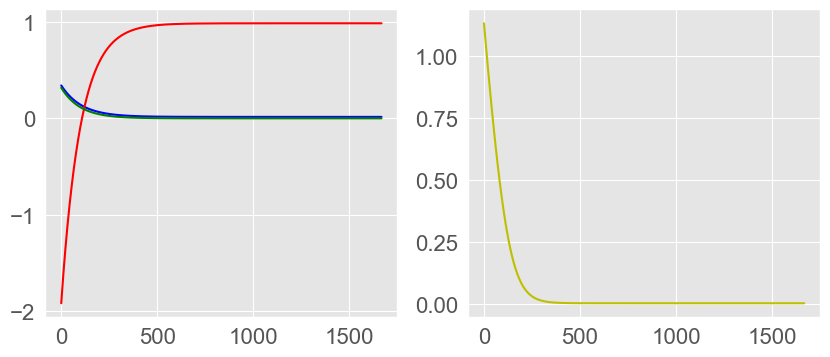

In [24]:
df = pd.concat([pd.DataFrame(w_list), pd.Series(lRMSE_list)], axis=1)
df.columns = ['w0','w1','w2', 'lRMSE']

f,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(df.w0, 'b-') 
ax[0].plot(df.w1, 'r-') 
ax[0].plot(df.w2, 'g-')

ax[1].plot(df.lRMSE, 'y-');

## Estimation (VII/VII)
*What are some computational advantages relative to OLS?*

Comparing OLS to GD, we have...
- OLS: Computation complexity is $\mathcal{O}\left(\boldsymbol{K}^{2} N\right)$.  Read more [here](https://math.stackexchange.com/questions/84495/computational-complexity-of-least-square-regression-operation)
    - Quadratic scaling in number of variables $(\boldsymbol{K})$ is slow

- GD:
    - Works despite high multicollinarity
    - Scales well: can be applied in subsets to very large data sets
        - We only need subset in memory!
    - Note: No guaranteed convergence time...
    


# VIDEO 11.2: Fitting a Polynomial

## Fitting a Polynomial (I/VII)
Consider some polynomial, e.g. $f\left(x\right)=2+8x^4$.

In order to ’learn’ this true functional form, try models of increasing order polynomials:
- Split data into train and test (just say 50/50)
- For polynomials of order 0 to 15, do the following:
    - In iteration $n$, consider a model on the form $y=\sum_{k=0}^n\left(\beta_k x^k\right)+\varepsilon$ (Taylor expansion type)
    - Estimate order $n$ model on *training* data 
    - Evaluate with *test* data with MSE
    - In total 16 models are estimated and evaluated.

## Fitting a Polynomial (II/VII)
Now, generate samples from the 'true' model:

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# DEFINE TRUE FUNCTION/DGP
def true_fct(X):
    return 2+8*X**4

# SET PARAMETERS
n_samples = 25
np.random.seed(161193)

# DRAW FEATURES AND DRAW TARGET BASED ON THESE
X_train = np.random.normal(size=(n_samples,1))
X_test  = np.random.normal(size=(n_samples,1))

y_train = true_fct(X_train).reshape(-1) + np.random.randn(n_samples) 
y_test  = true_fct(X_test).reshape(-1) + np.random.randn(n_samples)

## Fitting a Polynomial (III/VII)
Then estimate the polynomials and store MSE for train and test:

In [26]:
test_mse = []
train_mse = []
parameters = []

max_degree = 15
degrees = range(max_degree+1)

for p in degrees:
    X_train_p = PolynomialFeatures(degree=p).fit_transform(X_train) # poly. trans.
    X_test_p = PolynomialFeatures(degree=p).fit_transform(X_test) # poly. trans.
    
    reg = LinearRegression().fit(X_train_p, y_train) # fit on train
    
    train_mse.append(mse(reg.predict(X_train_p),y_train)) # eval. performance on train
    test_mse.append(mse(reg.predict(X_test_p),y_test))  # eval. performance on test     
    parameters.append(reg.coef_) # store parameters

## Fitting a Polynomial (IV/VII)
*So what happens to the model performance in- and out-of-sample?*

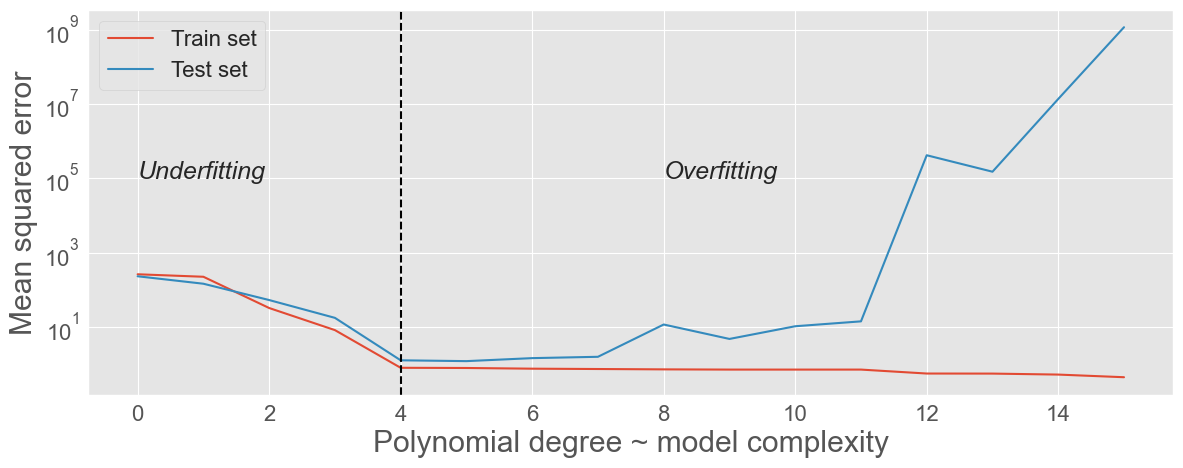

In [27]:
degree_index = pd.Index(degrees,name='Polynomial degree ~ model complexity')

ax = pd.DataFrame({'Train set':train_mse, 'Test set':test_mse})\
    .set_index(degree_index).plot(figsize=(14,5), logy=True)
ax.axvline(x = 4, color = 'black', linestyle = "dashed")

ax.text(0, 10**5, 'Underfitting', style='italic')
ax.text(8, 10**5, 'Overfitting', style='italic')

ax.set_ylabel('Mean squared error');

## Fitting a Polynomial (V/VII)

*What goes wrong on the test data?*

- More spurious parameters $\Rightarrow$ Weights fit idiosyncratic noise --- unrelated to true model!
- The coefficient size increases...

## Fitting a Polynomial (VI/VII)
*And by coefficient size, we mean?*

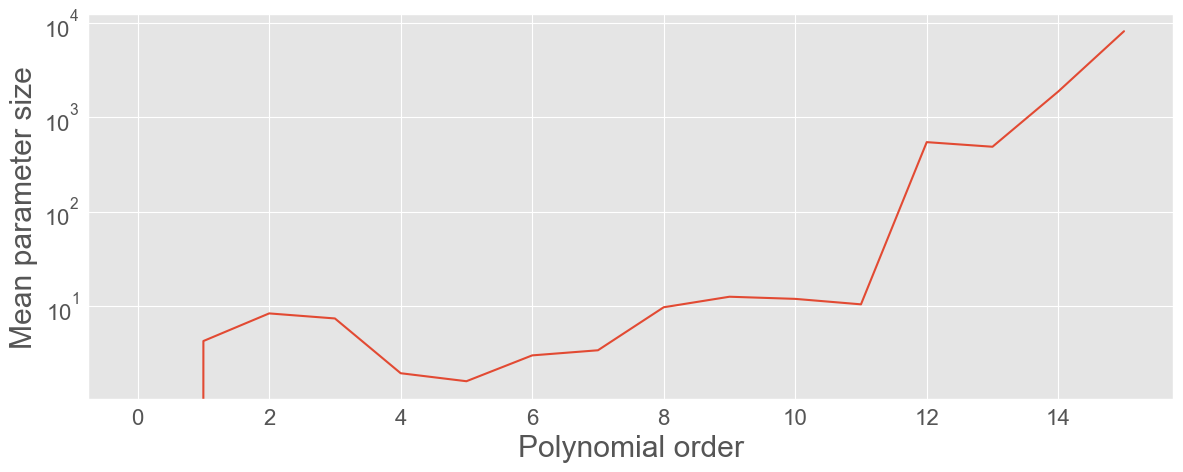

In [28]:
order_idx = pd.Index(range(max_degree+1),name='Polynomial order')
ax = pd.DataFrame(parameters,index=order_idx)\
.abs().mean(1).plot(figsize=(14,5),logy=True)
ax.set_ylabel('Mean parameter size');

## Fitting a polynomial (VII/VII)
*How else could we visualize this problem?*

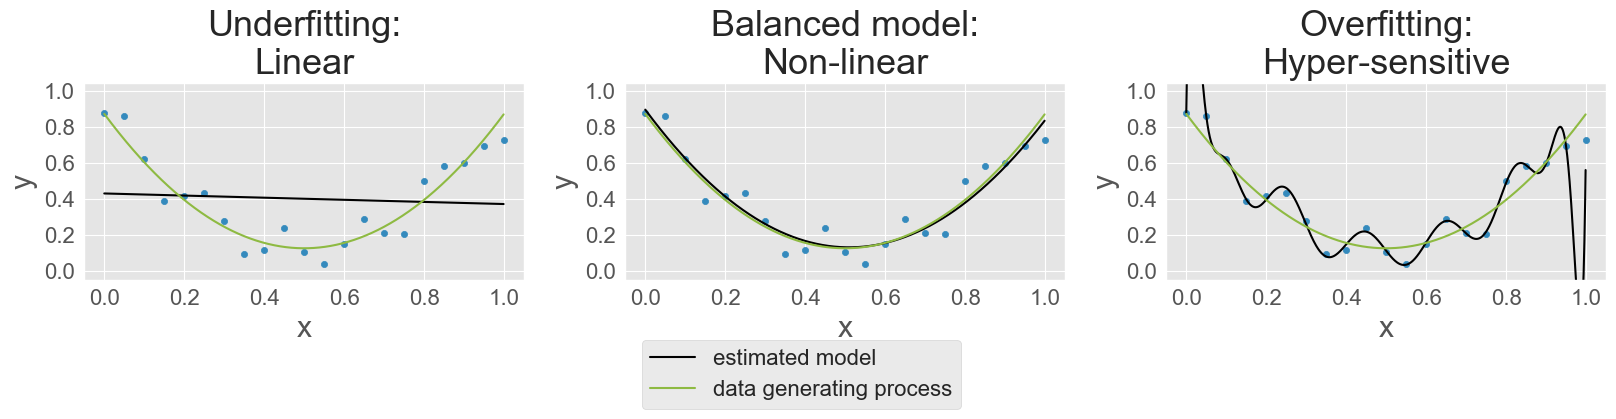

In [29]:
f_bias_var['regression'][2]

# VIDEO 11.3: Curing the Curse of Overfitting with Regularization

## Looking for a remedy
*How might we solve the overfitting problem?*

Considering what we just saw, we need to find a way to...
- reduce the number of variables considered in the model (but which?), and
- reduce the size of the estimated weights

## Regularization (I/VI)

*Why do we regularize?*

- To mitigate overfitting $\Rightarrow$ Gives better model predictions out of sample (you just saw this)

*How do we regularize?*

We 'make sure' to fit models that are less complex, by...
- reducing the number of variables considered in the model, and
- reducing the size of the estimated weights

## Regularization (II/VI)

*What does regularization look like?*

In *regression models*, we generally add a penalty term to our optimization procedure in the following fashion:
$$ \text{arg min}_\beta \, \underset{\text{MSE=SSE/n}}{\underbrace{E[(y_0 - \hat{f}(x_0))^2]}} + \underset{\text{penalty}}{\underbrace{\lambda \cdot R(\beta)}}$$

Intuition for this:
- Larger model parameter $\Rightarrow$ larger penalty to our measure of the quality of our model
-  Hence, introduction of penalties implies that increased model complexity has to be met with high increases in precision of estimates.

## Regularization (III/VI)

*What are some used penalty functions?*

The two most common penalty functions are L1 and L2 regularization.

- L1 regularization (***Lasso***): $R(\beta)=\sum_{j=1}^{p}|\beta_j|$ 
    - Makes coefficients sparse, i.e. 'selects' variables by removing some (if $\lambda$ is high at least)
    
    
- L2 regularization (***Ridge***): $R(\beta)=\sum_{j=1}^{p}\beta_j^2$
    - Reduce coefficient size
    - Fast due to analytical solution
    
*Note:* The *Elastic Net* uses a combination of L1 and L2 regularization.

## Regularization (IV/VI)

*How the Lasso (L1 reg.) deviates from OLS*


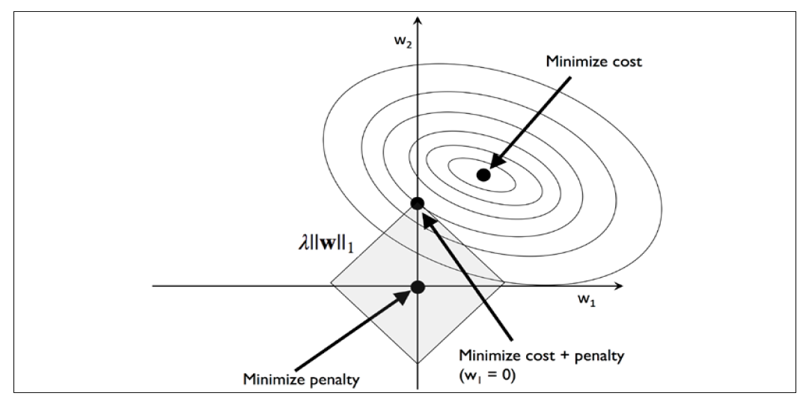

In [30]:
from PIL import Image
image = Image.open('lasso.PNG').resize((800, 400))
image


## Regularization (V/VI)

*How the Ridge regression (L2 reg.) deviates from OLS*

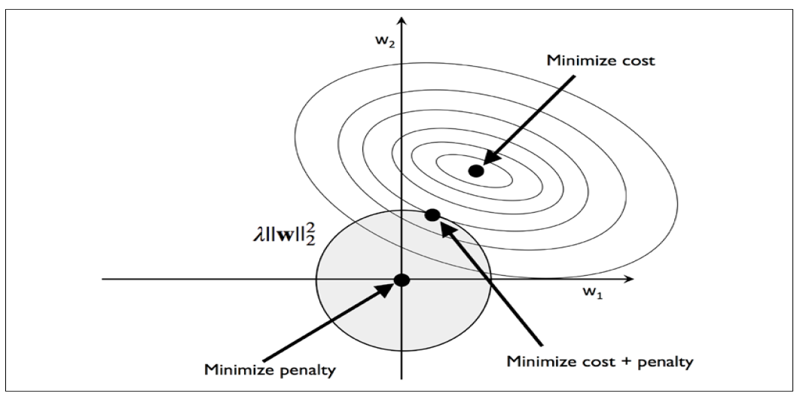

In [31]:
image = Image.open('ridge.PNG').resize((800, 400))
image


## Regularization (VI/VI)

*How might we describe the $\lambda$ of Lasso and Ridge?*

These are hyperparameters that we can optimize over. 
- More about this tomorrow.

*Is there a generalization of of Lasso and Ridge?*

Yes, the elastic net allows both types of regularization. Therefore, it has two hyperparameters.

# VIDEO 11.4: Implementation Details

## Underfitting Remedies (I/II)
*Is it possible to solve the underfitting problem?*

Of course no exact solution, but in general two ways:
1. Using polynomial interactions of all features:
    - This is known as Taylor expansion
    - Note: we need to use regularization too $-$ curbs impact on overfitting!
2. Using non-linear models that can capture all patterns:
    - These are called universal approximators
    - We will return to these in later sessions

## Underfitting Remedies (II/II)
*Some of the models we see here, e.g. Perceptrons, seem too simple - are they ever useful?*

No, not for serious machine learning.

But for exposition (your learning), yes. 

In particular, the perceptron and related models are building blocks for building neural networks.

Hence, it builds up intuition about how more advanced --- and much more frequently used --- ML algorithms also work!

## The Devils in the Details (I/IV)

*So we just run regularization?*

# NO!

We need to rescale our features. Rule of thumb is...
- convert to zero mean, and
- standardize to unit std.

Why? Different variables need to be penalized in the same manner!

In practice, in Python:
- Option 1: `StandardScaler` in `sklearn` (recommended $-$ now, no good reason not to)
- Option 2: `(X - np.mean(X)) / np.std(X)`



## The Devils in the Details (II/IV)
*So we just scale our test and train?*

# NO

Fit to the distribution in the **training data first**, then rescale both train and test! See more [here](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

Mantra: Anything you learn must be learned from the training data! Why?
- Otherwise, you may end up with data leakage!
- Rescaling test observations relative to test data set might cause overfitting and biased estimates of out-of-sample accuracy.

## The Devils in the Details (III/IV)
*So we just rescale before using polynomial features?*

# NO

If you do so, the interacted variables are not Gaussian distributed.

Simply a matter of the order in which you do things...

## The Devils in the Details (IV/IV)
*Is there a way to streamline the workflow?*

# YES!

We can build a Pipeline using `sklearn`:

   - Use Pipeline to chain the `PolynomialFeatures`, `StandardScaler`, etc.
   - We can then call the `fit` and `predict` methods on the Pipeline to build and evaluate a model that handles
    all the intermediate steps (transformations) automatically.
    
We will talk more about this in the next session